<a href="https://colab.research.google.com/github/komorimasashi/bunka-hakaru/blob/main/RGBtoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab import files

Saving 5swM3Myy_400x400.jpg to 5swM3Myy_400x400.jpg


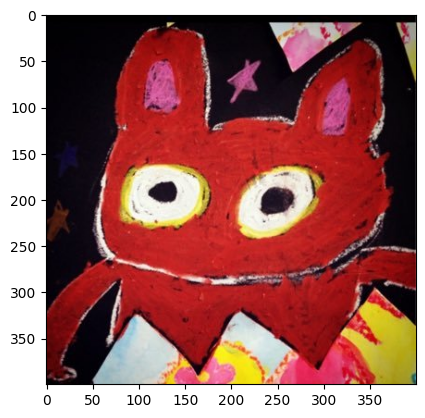

In [ ]:
# 画像の読み込み
uploaded = files.upload()
uploaded_file_name = next(iter(uploaded))
im = cv2.imread(uploaded_file_name)
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [ ]:
# RGB画像の中身を見てみよう
img_array = np.asarray(im_rgb) #numpyで扱える配列をつくる
print(img_array.shape) # 配列の次元と要素を調べる　(500, 500, 3)の3がRGBの色チャネル

(400, 400, 3)


In [ ]:
# 左上の画素のRGB値を見てみる
print(img_array[1,1,:])

[0 0 0]


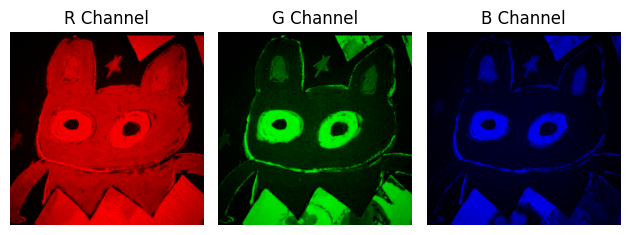

In [ ]:
im_r = im_rgb.copy()
im_r[:,:, (1,2)]=0 #全ピクセルの色データの1,2番目(GとB)の数値を０にする
im_g = im_rgb.copy()
im_g[:,:, (0,2)]=0 #全ピクセルの色データの0,2番目(RとB)の数値を０にする
im_b = im_rgb.copy()
im_b[:,:, (0,1)]=0 #全ピクセルの色データの0,1番目(RとG)の数値を０にする

plt.subplot(131)
plt.imshow(im_r)
plt.title('R Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(im_g)
plt.title('G Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(im_b)
plt.title('B Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### RGBをLa*b*に変換する

In [ ]:
# RGB値をCIE L*a*b*値に変換する
def rgb_to_lab(rgb):
    lab = cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2LAB)
    return lab[0][0]

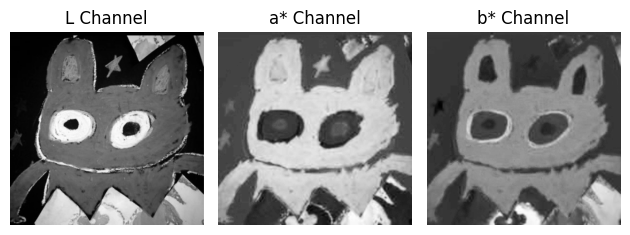

In [ ]:
# RGB画像をCIE L*a*b*に変換する
im_lab = np.zeros_like(im_rgb, dtype=np.float32)
for i in range(im_rgb.shape[0]):
    for j in range(im_rgb.shape[1]):
        im_lab[i, j] = rgb_to_lab(im_rgb[i, j])

# L*a*b*それぞれのチャネルに分ける
L_channel = im_lab[:, :, 0]
a_channel = im_lab[:, :, 1]
b_channel = im_lab[:, :, 2]

# L*a*b*それぞれをグレースケール画像として表示する
L_grayscale = np.uint8(L_channel)
a_grayscale = np.uint8(a_channel + 128)  # a* の値を0-255の範囲に変換
b_grayscale = np.uint8(b_channel + 128)  # b*  の値を0-255の範囲に変換

plt.subplot(131)
plt.imshow(L_channel, cmap='gray')
plt.title('L Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(a_channel, cmap='gray')
plt.title('a* Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(b_channel, cmap='gray')
plt.title('b* Channel')
plt.axis('off')

plt.tight_layout()
plt.show()